[Banking Dataset](https://www.kaggle.com/janiobachmann/bank-marketing-dataset/data#)

## Project Goal

* Find some actionable insights that will help the marketing team make plans for a campaign that aims to maximize the amount of new term deposit subscribers.

## Column Labels

* <b>age:</b> how old someone is (numeric)
* <b>job:</b> type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* <b>marital:</b> marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* <b>education:</b> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* <b>default:</b> has credit in default? (categorical: 'no','yes','unknown')
* <b>balance:</b> amount of money in bank account (numeric)
* <b>housing:</b> has housing loan? (categorical: 'no','yes','unknown')
* <b>loan:</b> has personal loan? (categorical: 'no','yes','unknown')
* <b>contact:</b> contact communication type (categorical: 'cellular','telephone')
* <b>day:</b> last contact day of month (1-31)
* <b>month:</b> last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* <b>duration:</b> last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* <b>campaign:</b> number of contacts performed during this campaign and for this client (numeric, includes last contact)
* <b>pdays:</b> number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
* <b>previous:</b> number of contacts performed before this campaign and for this client (numeric)
* <b>poutcome:</b> outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* <b>deposit:</b> has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('husl')
%matplotlib inline

## Data Exploration

In [2]:
bf = pd.read_csv('bank.csv')

In [3]:
bf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Data Cleaning

In [5]:
# Given that "-1" is a missing value for the pdays column, I will change "-1" to a NaN value.
bf['pdays'] = bf['pdays'].replace(-1,np.nan)

In [6]:
# Convert day column into string object type since I want to analyze it as a categorical value.
bf['day'] = bf['day'].astype(str)

In [7]:
# Checking percentage of missing values for each column.
100*bf.isnull().sum()/len(bf.index)

age           0.000000
job           0.000000
marital       0.000000
education     0.000000
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays        74.574449
previous      0.000000
poutcome      0.000000
deposit       0.000000
dtype: float64

* I will go ahead and drop the pdays column since 74.574449% (missing value threshold percentage ~25.00%) of the pdays column is NaN.

In [8]:
bf = bf.drop('pdays',axis=1)

In [9]:
# Checking for duplicate rows.
bf.duplicated().sum()

0

In [10]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  object
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(5), object(11)
memory usage: 1.4+ MB


## Numerical Exploration

In [11]:
# Exploring the numerical columns on this dataset
bf_num = bf[['age','balance','duration','campaign','previous']]
bf_num.head()

,age,balance,duration,campaign,previous
0,59,2343,1042,1,0
1,56,45,1467,1,0
2,41,1270,1389,1,0
3,55,2476,579,1,0
4,54,184,673,2,0


In [12]:
bf_num.describe()

,age,balance,duration,campaign,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557
std,11.913369,3225.413326,347.128386,2.722077,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18522610>,
      dtype=object)

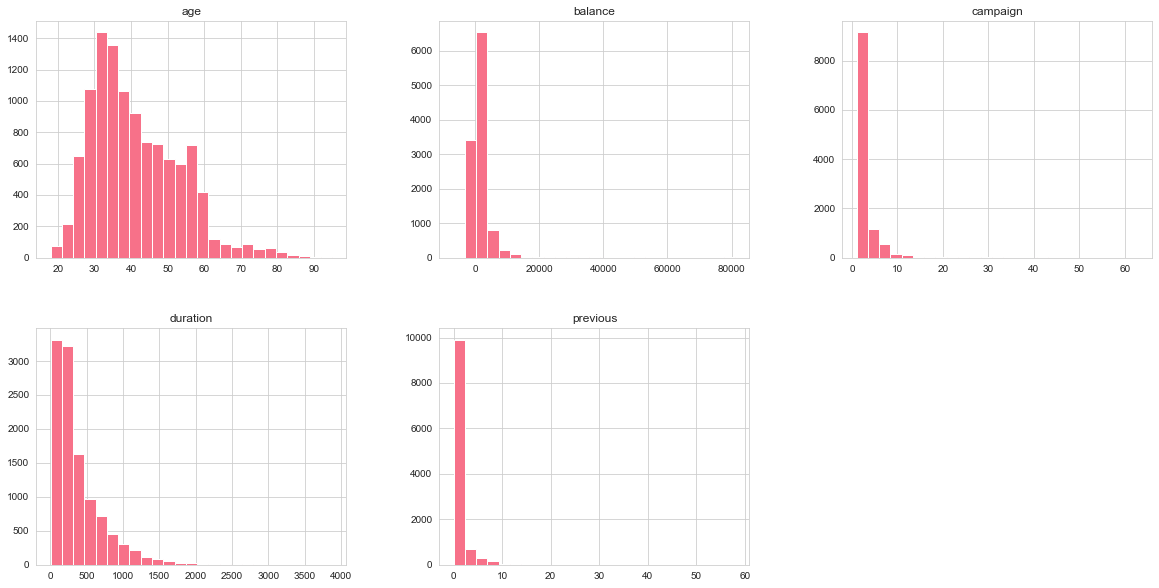

In [13]:
bf_num.hist(bins=25, figsize=(20, 10), layout=(2, 3))

* There looks like there may be some noisy outliers for balance, campaign, duration, and previous
* There looks to be a heavy bias towards a single value for balance, campaign, and previous

In [14]:
bf.describe()

,age,balance,duration,campaign,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557
std,11.913369,3225.413326,347.128386,2.722077,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000


In [15]:
# Checking the median count for numerical columns that look heavily biased towards a single value
print(bf[bf['balance']==550].count()[0])
print(bf[bf['campaign']==2].count()[0])
print(bf[bf['previous']==0].count()[0])

6
3028
8324


* A significant number of the values for the campaign and previous columns are the exact same.
* For that reason, I will impute the outliers for each column with their corresponding median values.

In [16]:
# Median imputation for campaign, pdays, and previous
bf['campaign'][bf['campaign']>=13] = bf['campaign'].median()
bf['previous'][bf['previous']>=9] = bf['previous'].median()

/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Performing outlier treatment for age, balance, and duration
Q1 = bf.quantile(.25)
Q3 = bf.quantile(.75)

In [18]:
IQR = Q3['age']-Q1['age']
IB = Q1['age']-(1.5*IQR)
UB = Q3['age']+(1.5*IQR)
bf[(bf['age']<IB) | (bf['age']>UB)] = np.nan
bf = bf.dropna()

In [19]:
IQR = Q3['balance']-Q1['balance']
IB = Q1['balance']-(1.5*IQR)
UB = Q3['balance']+(1.5*IQR)
bf[(bf['balance']<IB) | (bf['balance']>UB)] = np.nan
bf = bf.dropna()

In [20]:
IQR = Q3['duration']-Q1['duration']
IB = Q1['duration']-(1.5*IQR)
UB = Q3['duration']+(1.5*IQR)
bf[(bf['duration']<IB) | (bf['duration']>UB)] = np.nan
bf = bf.dropna()

In [21]:
bf_num = bf[['age','balance','day','duration','campaign','previous']]
bf_num.head()

,age,balance,day,duration,campaign,previous
3,55.0,2476.0,5,579.0,1.0,0.0
4,54.0,184.0,5,673.0,2.0,0.0
5,42.0,0.0,5,562.0,2.0,0.0
7,60.0,545.0,6,1030.0,1.0,0.0
8,37.0,1.0,6,608.0,1.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18d31350>,
      dtype=object)

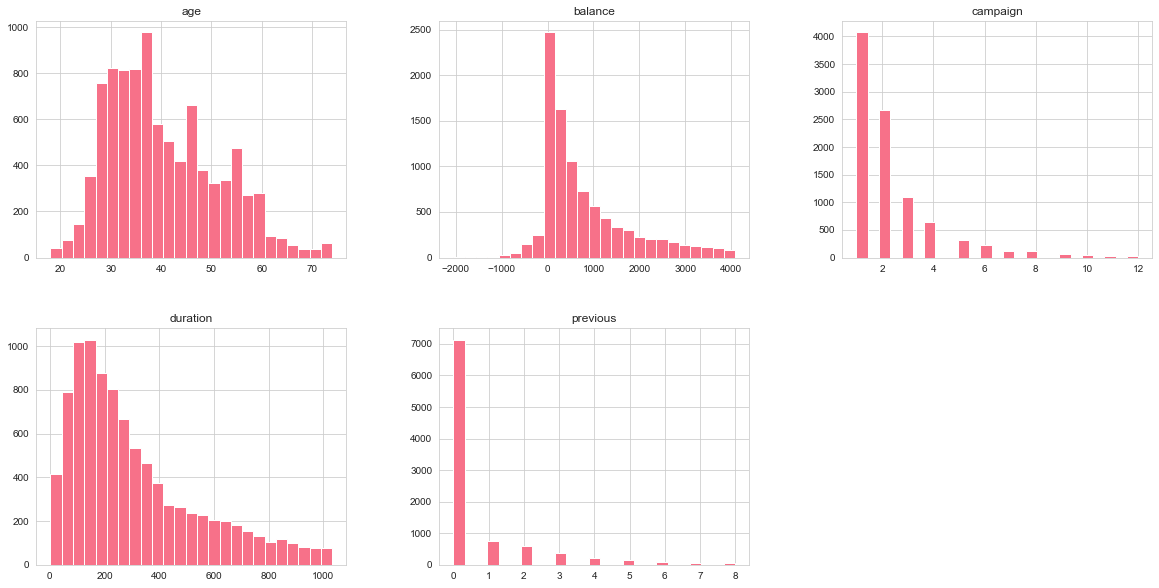

In [22]:
bf_num.hist(bins=25, figsize=(20, 10), layout=(2, 3))

* Numerical graphs after removing the outliers

## Categorical Exploration

In [23]:
# Exploring the categorical columns on this dataset
categorical = bf[['job','marital','education','default','housing','loan','contact','day','month','poutcome']]
categorical.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome
3,services,married,secondary,no,yes,no,unknown,5,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,5,may,unknown
5,management,single,tertiary,no,yes,yes,unknown,5,may,unknown
7,retired,divorced,secondary,no,yes,no,unknown,6,may,unknown
8,technician,married,secondary,no,yes,no,unknown,6,may,unknown


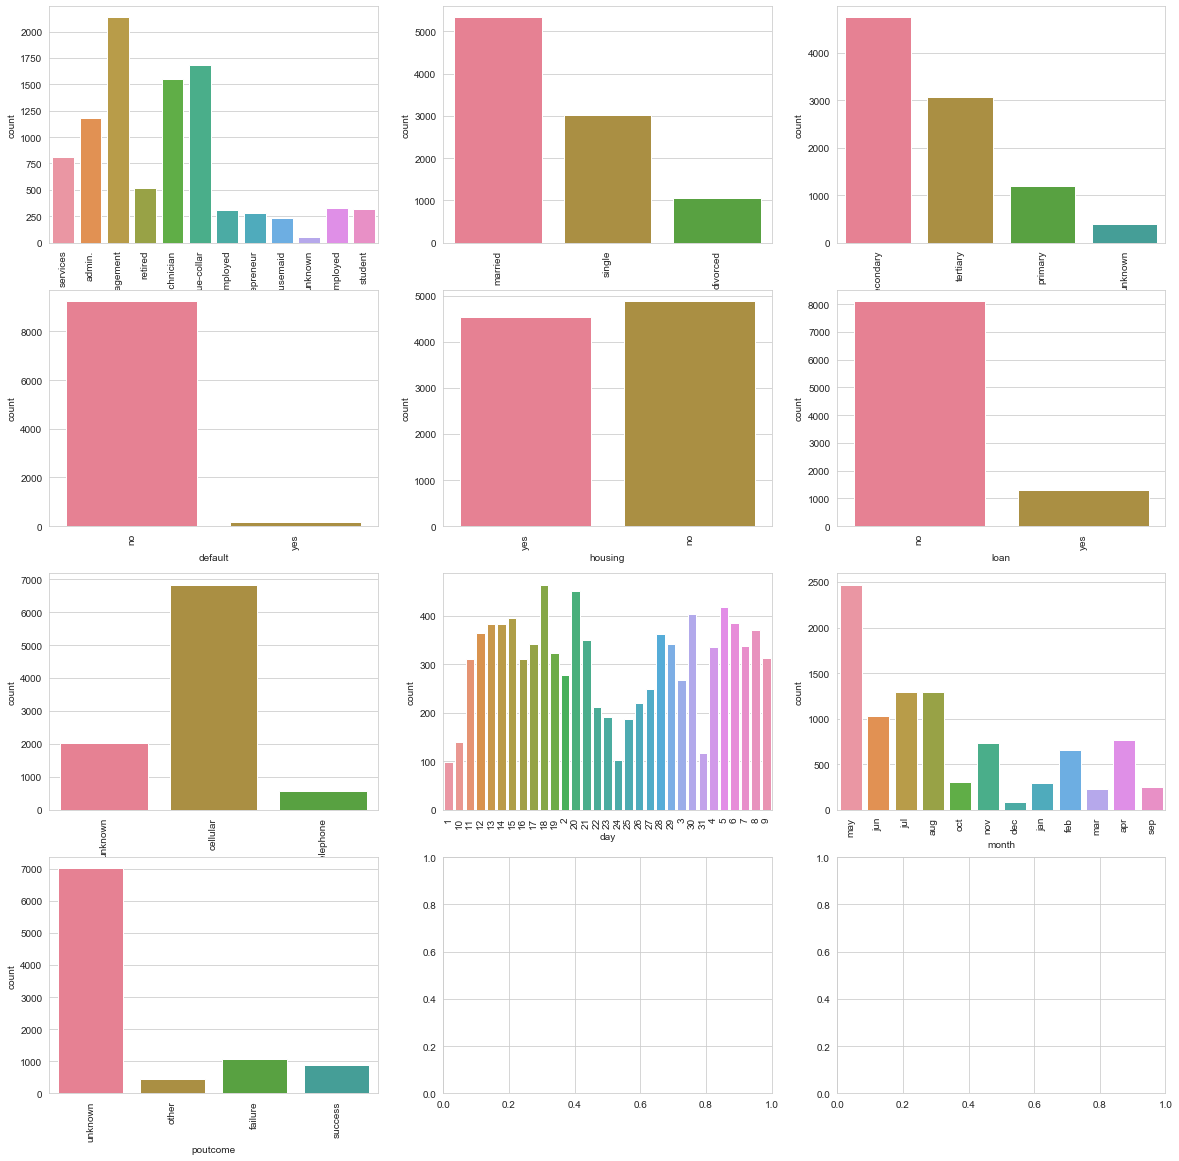

In [24]:
# Checking out the categorical values for the independent variables
fig, ax = plt.subplots(4,3, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(categorical[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

* The poutcome column does not look like it will be useful for the prediction model

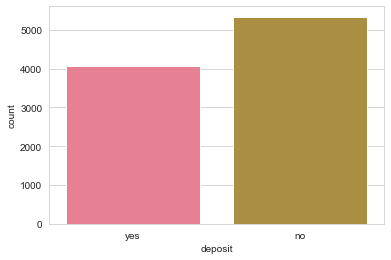

In [25]:
sns.countplot(bf['deposit'])

## Analyzing Response Variable (Deposit) with Numerical Values

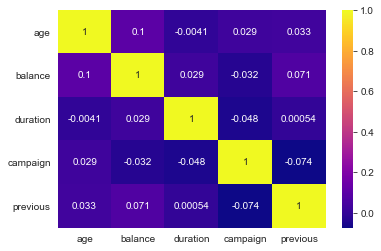

In [26]:
# Heatmap visualizing correlation between the numerical values
sns.heatmap(bf.corr(),annot=True,cmap='plasma')

* Based on the heatmap, there doesn't seem to be much of a correlation between the numerical values
* Most significant positive correlation is between age and balance

In [27]:
# Summary statistic of people who have a term deposit
bf[bf['deposit']=='yes'].describe()

,age,balance,duration,campaign,previous
count,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000
mean,40.412285,961.557248,438.550369,1.995086,0.988943
std,12.358018,1046.556674,248.264778,1.504797,1.708011
min,18.000000,-1944.000000,8.000000,1.000000,0.000000
25%,31.000000,168.000000,230.000000,1.000000,0.000000
50%,37.000000,568.500000,384.000000,1.000000,0.000000
75%,49.000000,1527.750000,623.000000,2.000000,1.000000
max,74.000000,4079.000000,1033.000000,12.000000,8.000000


In [28]:
# Summary statistic of people who do not have a term deposit
bf[bf['deposit']=='no'].describe()

,age,balance,duration,campaign,previous
count,5335.000000,5335.000000,5335.000000,5335.000000,5335.000000
mean,40.353889,676.590066,209.743768,2.510778,0.382381
std,9.703187,934.839430,169.245588,2.006697,1.142126
min,18.000000,-2049.000000,2.000000,1.000000,0.000000
25%,33.000000,41.500000,92.000000,1.000000,0.000000
50%,39.000000,333.000000,162.000000,2.000000,0.000000
75%,48.000000,980.000000,273.000000,3.000000,0.000000
max,74.000000,4087.000000,1020.000000,12.000000,8.000000


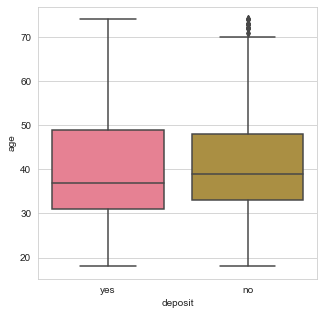

In [29]:
plt.figure(figsize=(5,5))
sns.boxplot(bf['deposit'],bf['age'])

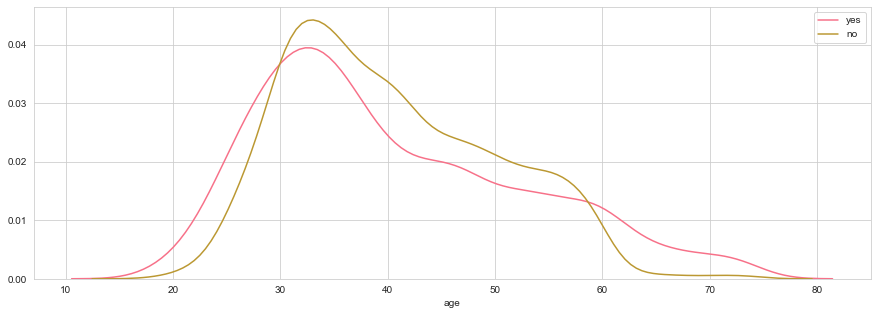

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(bf[bf['deposit']=='yes']['age'],hist=False,label='yes')
sns.distplot(bf[bf['deposit']=='no']['age'],hist=False,label='no')

* On average, people who are older tend to have a subscription for term deposits.
* Best to target people who are less than 30 years old AND greater than 58 years old.

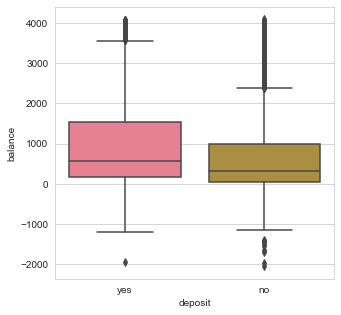

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(bf['deposit'],bf['balance'])

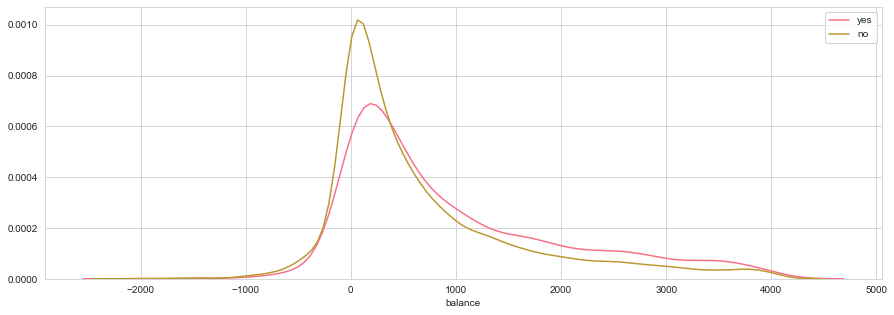

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(bf[bf['deposit']=='yes']['balance'],hist=False,label='yes')
sns.distplot(bf[bf['deposit']=='no']['balance'],hist=False,label='no')

* On average, people with a higher balance tend to have a subscription for term deposits.
* Best to target people who have $500 or more.

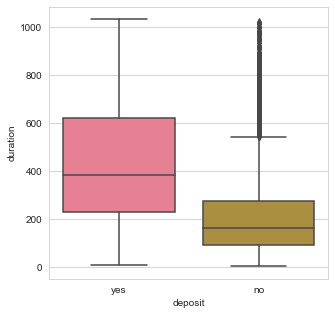

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(bf['deposit'],bf['duration'])

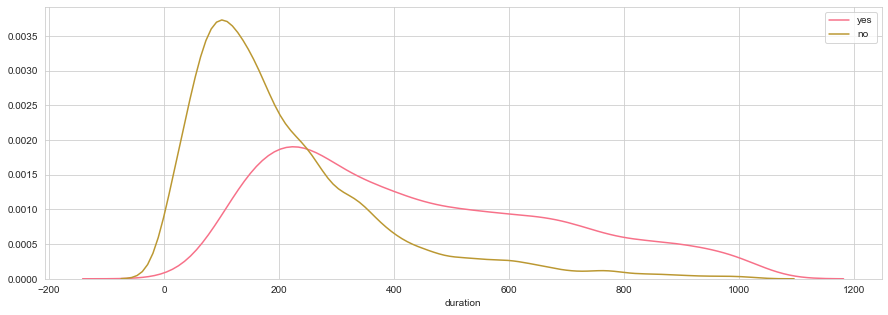

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(bf[bf['deposit']=='yes']['duration'],hist=False,label='yes')
sns.distplot(bf[bf['deposit']=='no']['duration'],hist=False,label='no')

* On average, people who were on a longer call session per second tend to have a subscription for term deposits.
* When making a call, a good duration to end the call is around 250 seconds or longer.

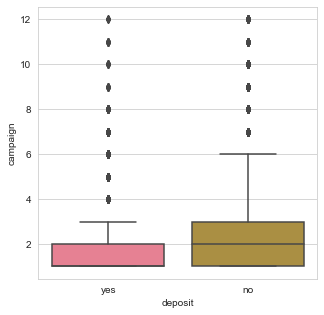

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(bf['deposit'],bf['campaign'])

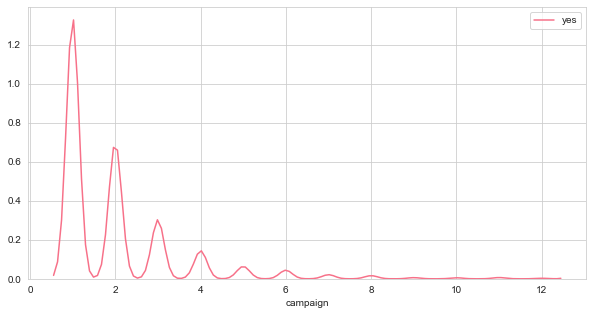

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(bf[bf['deposit']=='yes']['campaign'],hist=False,label='yes')

* People who were contacted more than two times about the term deposit in a single campaign are less likely to subscribe to a term deposit.

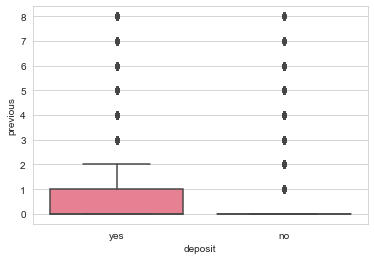

In [37]:
#plt.figure(figsize=(5,5))
sns.boxplot(bf['deposit'],bf['previous'])

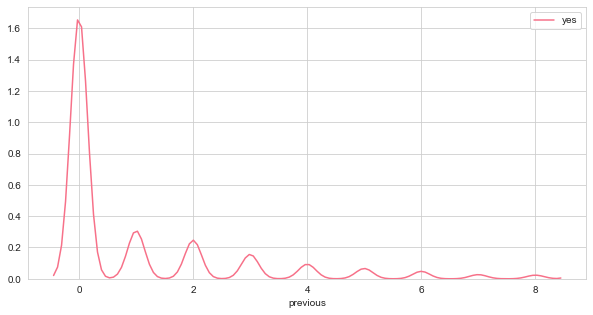

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(bf[bf['deposit']=='yes']['previous'],hist=False,label='yes')

* People were more likely to subscribe to a term deposit if the amount of calls in the previous campaign is greater than zero, but there is a decreasing return the more calls there are.
* Reasons might include people labeling the excess amount of calls as spam.

## Analyzing Response Variable (Deposit) with Categorical Values

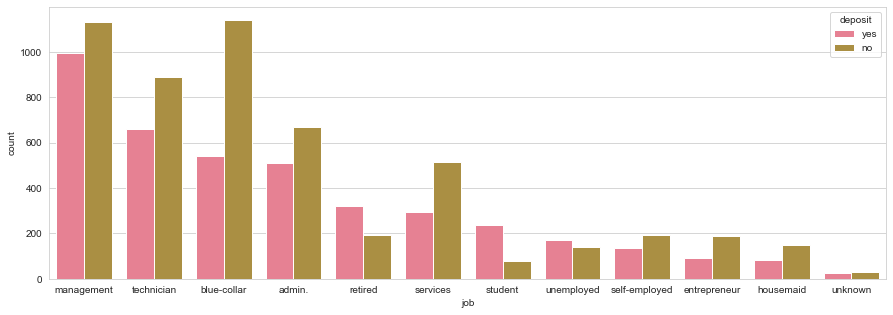

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(bf['job'],order=bf[bf['deposit']=='yes']['job'].value_counts().index,hue=bf['deposit'])

* People who are retired, students, or unemployed are good targets for term deposits since they are more likely to subscribe to a term deposit than other job types. However, it is a good idea to work on improving the conversion rate for people who work management, technician, or blue-collar jobs since they make up the majority of the sample.

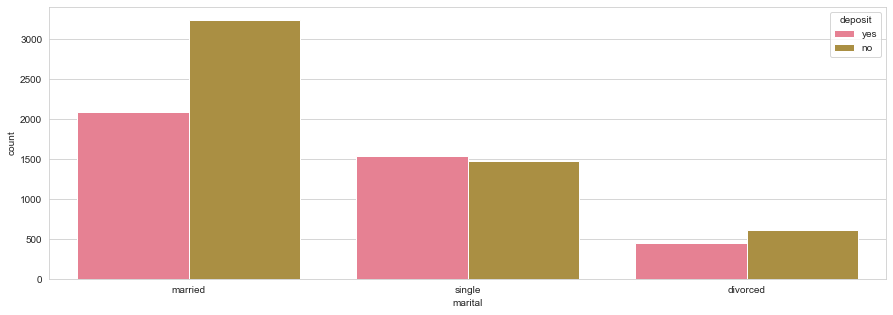

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(bf['marital'],hue=bf['deposit'])

* Single people are most likely to subscribe to term deposits, compared to married or divorced couples.

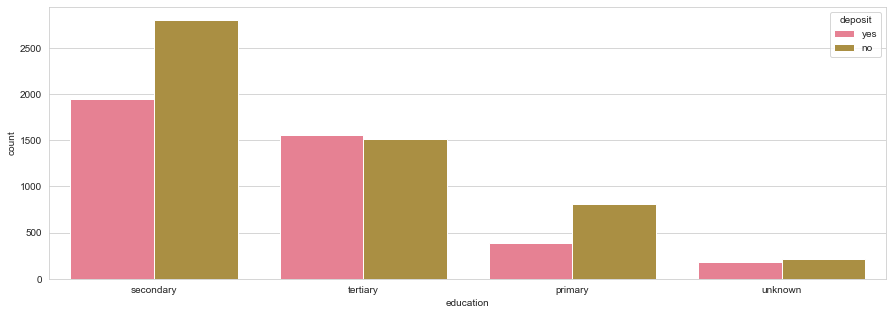

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(bf['education'],hue=bf['deposit'])

* The higher a person's education, the more likely they are to subscribe to a term deposit (tertiary > secondary > primary).

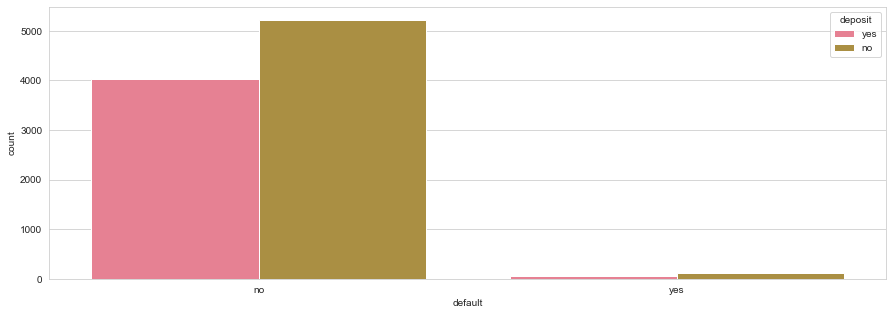

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(bf['default'],hue=bf['deposit'])

* A default in credit doesn't look like it has much of an impact since there isn't a noticible trend on a person's decision to subscribe to a term deposit. Regardless if a person defaulted on their credit or not, he/she isn't likely to have a term deposit.

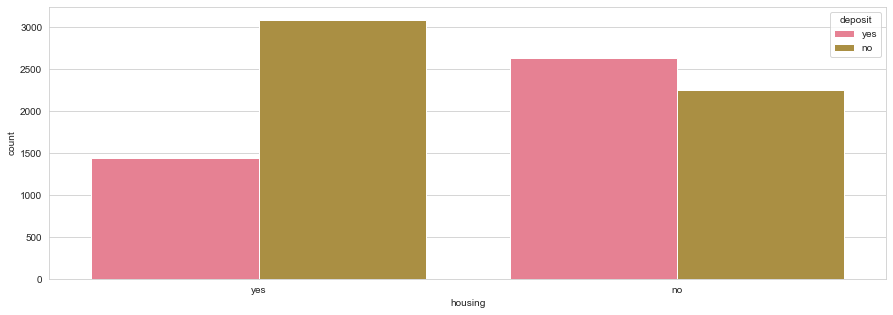

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(bf['housing'],hue=bf['deposit'])

* People with no housing loans are more likely to subscribe to a term deposit.

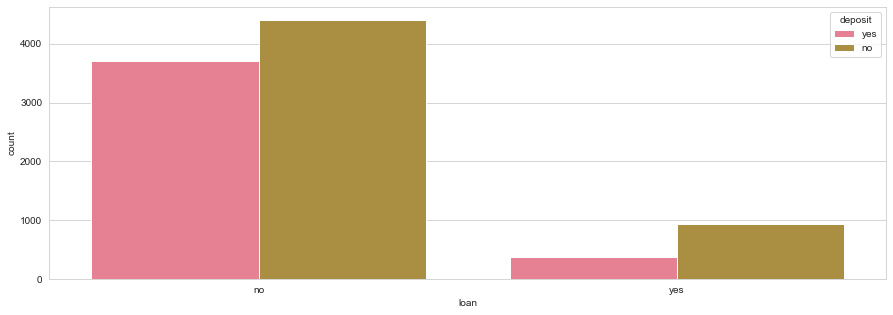

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(bf['loan'],hue=bf['deposit'])

* A personal loan doesn't look like it has much of an impact since there isn't a noticible trend on a person's decision to subscribe to a term deposit. Regardless if a person has a personal loan or not, he/she isn't likely to have a term deposit.

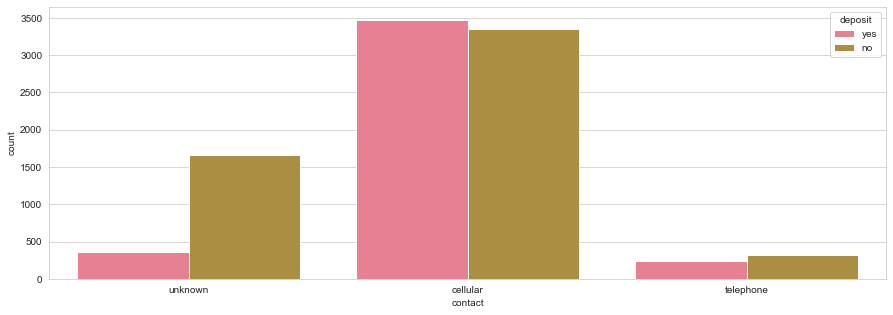

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(bf['contact'],hue=bf['deposit'])

* People who are contacted by their cellular devices are more likely to convert to a subscription for term deposits, compared to telephones or other devices.

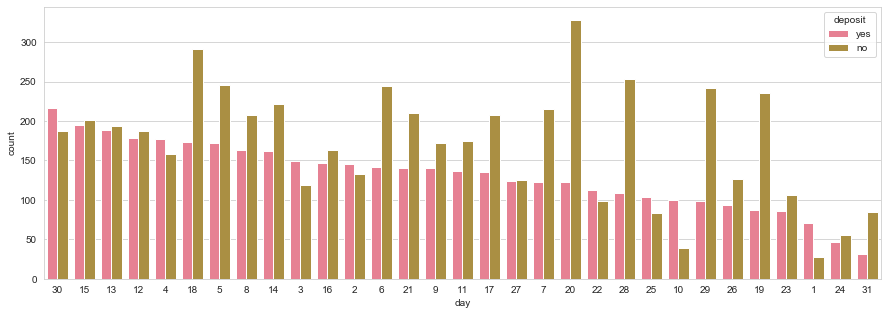

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(bf['day'],order=bf[bf['deposit']=='yes']['day'].value_counts().index,hue=bf['deposit'])

* 1, 2, 3, 4, 10, 12, 13, 15, 16, 22, 23, 24, 25, 27, 30 are the days of last contact for customers who were more likely to subscribe to a term deposit. Overwhelmingly so for days 1, 10, and 30.

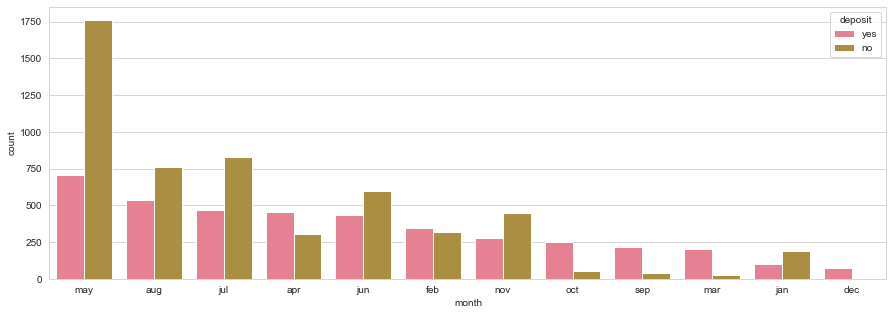

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(bf['month'],order=bf[bf['deposit']=='yes']['month'].value_counts().index,hue=bf['deposit'])

* April, February, October, September, March, and December seem like good months to call people for a term deposit subscription.

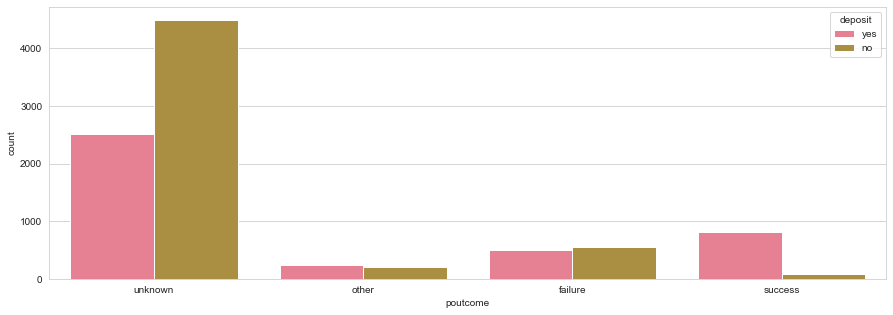

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(bf['poutcome'],hue=bf['deposit'])

* If the previous campaign event was considered successful for a client, he/she are more likely to have a subscription for a term deposit. However, people seem to be indifferent with a previous campaign outcome of "other" or "failure" (no effect).

## Model Preperation

In [49]:
bf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579.0,1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673.0,2.0,0.0,unknown,yes
5,42.0,management,single,tertiary,no,0.0,yes,yes,unknown,5,may,562.0,2.0,0.0,unknown,yes
7,60.0,retired,divorced,secondary,no,545.0,yes,no,unknown,6,may,1030.0,1.0,0.0,unknown,yes
8,37.0,technician,married,secondary,no,1.0,yes,no,unknown,6,may,608.0,1.0,0.0,unknown,yes


In [50]:
# Making some dummy variables for independent categorical values
job_dv = pd.get_dummies(bf['job'],drop_first=True)
marital_dv = pd.get_dummies(bf['marital'],drop_first=True)
education_dv = pd.get_dummies(bf['education'],drop_first=True)
default_dv = pd.get_dummies(bf['default'],drop_first=True)
housing_dv = pd.get_dummies(bf['housing'],drop_first=True)
loan_dv = pd.get_dummies(bf['loan'],drop_first=True)
contact_dv = pd.get_dummies(bf['contact'],drop_first=True)
day_dv = pd.get_dummies(bf['day'],drop_first=True)
month_dv = pd.get_dummies(bf['job'],drop_first=True)
poutcome_dv = pd.get_dummies(bf['poutcome'],drop_first=True)

In [51]:
bf = pd.concat([bf,job_dv,marital_dv,education_dv,default_dv,housing_dv,
               loan_dv,contact_dv,day_dv,month_dv,poutcome_dv],axis=1)

In [52]:
# Removing categorical values since I got the dummy variables off them
bf = bf.drop(['job','marital','education','default','housing','loan','contact','day','month','poutcome'],axis=1)

## Model Creation

In [53]:
X = bf.drop('deposit',axis=1)
y = bf['deposit']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
# Feature Scaling to normalize/standardize features (columns)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression()

In [58]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [60]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(logmod,X=X_train,y=y_train,cv=5,scoring='accuracy',verbose=2).mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
0.8075478900120168


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [62]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn,X=X_train,y=y_train,cv=5,scoring='accuracy',verbose=2).mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
0.671320421290733


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


In [63]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc,X=X_train,y=y_train,cv=5,scoring='accuracy',verbose=2).mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
0.8183149254258855


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [64]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm,X=X_train,y=y_train,cv=5,scoring='accuracy',verbose=2).mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   2.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.4s
[CV]  ................................................................
[CV] ................................................. , total=   2.3s
0.8030302360924578


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.1s finished


* The Random Forest Model model got the best accuracy result from the K Fold Cross-Validation, and the computational cost is small too! For that reason, I will be using the Random Forest Model as the classifier for this project.

## Tweaking Parameters and Fitting Model

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'n_estimators':[10,100,1000],'max_features':['auto', 'sqrt', 'log2'],'min_samples_leaf':[1,10,50]}
grid = GridSearchCV(rfc,param_grid,cv=5,verbose=2)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=100, total=   0.7s
[CV] max_features=auto, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=1000, total=   6.6s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=1000 ........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=1000, total=   6.6s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=10, total=   0.1s
[CV] max_features=sqrt, min_sampl

[CV]  max_features=log2, min_samples_leaf=10, n_estimators=100, total=   0.4s
[CV] max_features=log2, min_samples_leaf=10, n_estimators=1000 .......
[CV]  max_features=log2, min_samples_leaf=10, n_estimators=1000, total=   3.9s
[CV] max_features=log2, min_samples_leaf=10, n_estimators=1000 .......
[CV]  max_features=log2, min_samples_leaf=10, n_estimators=1000, total=   3.8s
[CV] max_features=log2, min_samples_leaf=10, n_estimators=1000 .......
[CV]  max_features=log2, min_samples_leaf=10, n_estimators=1000, total=   3.8s
[CV] max_features=log2, min_samples_leaf=10, n_estimators=1000 .......
[CV]  max_features=log2, min_samples_leaf=10, n_estimators=1000, total=   3.9s
[CV] max_features=log2, min_samples_leaf=10, n_estimators=1000 .......
[CV]  max_features=log2, min_samples_leaf=10, n_estimators=1000, total=   3.9s
[CV] max_features=log2, min_samples_leaf=50, n_estimators=10 .........
[CV]  max_features=log2, min_samples_leaf=50, n_estimators=10, total=   0.0s
[CV] max_features=log2, 

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [68]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Evaluations

In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [71]:
prediction = grid.predict(X_test)

In [72]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))
print('\n')
print(f'accuracy score = {accuracy_score(y_test,prediction)}')

[[911 178]
 [167 625]]


              precision    recall  f1-score   support

          no       0.85      0.84      0.84      1089
         yes       0.78      0.79      0.78       792

    accuracy                           0.82      1881
   macro avg       0.81      0.81      0.81      1881
weighted avg       0.82      0.82      0.82      1881



accuracy score = 0.8165869218500797


* Overall, the weighted f1-score (average of weighted precision and recall score) is 82%. This means that the model is highly accurate, but not too accurate to the point where it loses its predictive capabilities.

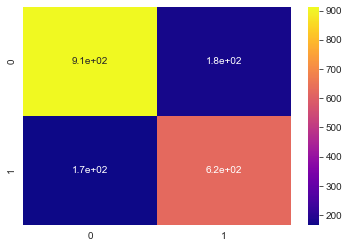

In [73]:
# Visualization of confusion matrix
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='plasma')

In [74]:
# Getting feature weights
importance = grid.best_estimator_.feature_importances_
impdf = pd.DataFrame(np.around(importance,4)*100,X.columns,['Importance'])

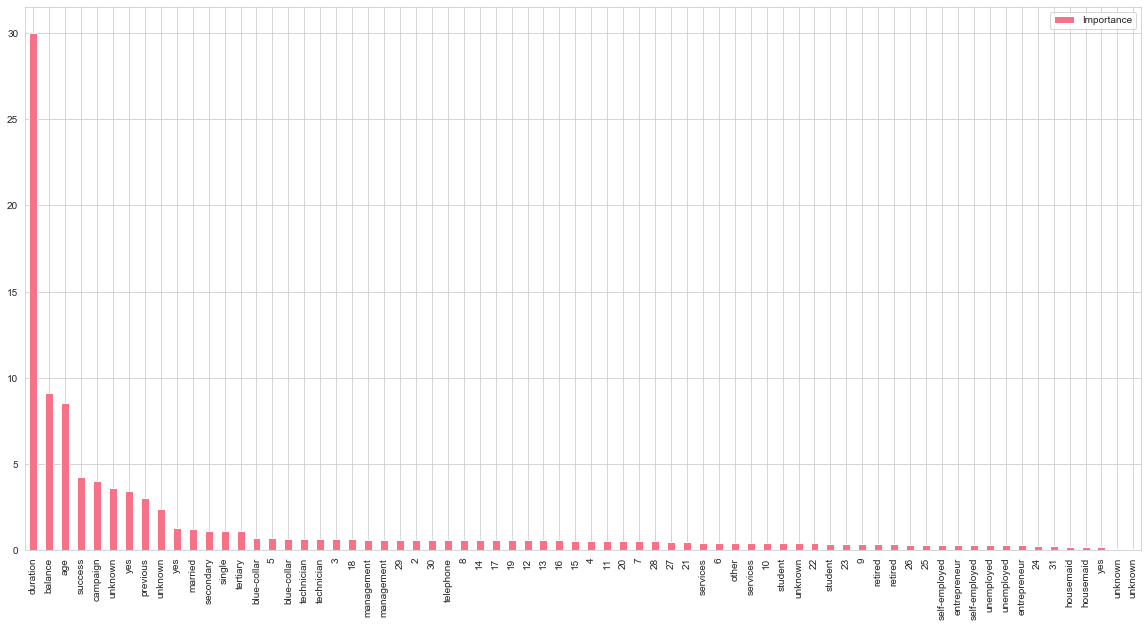

In [75]:
impdf.sort_values('Importance',ascending=False).plot(kind='bar',figsize=(20,10))

* The campaign's duration, balance of the clients, and age of the clients are the top three biggest contributors of the model's result

## Summary

* <b>Top 3 Factors:</b> The top three things that the marketing team must focus on when planning a new campaign to gain more subscribers for term deposits.
    1. <b>Duration:</b> Increase the <u>duration of each call to about 250 seconds or more</u> (about 4 minutes).
    2. <b>Balance:</b> Target clients who have a <u>balance greater or equal to 500 dollars</u>.
    3. <b>Age:</b> On average, target clients who are older. A more specific range are <u>people who are less than 30 years old AND greater than 58 years old</u>.

<br>

* <b>Notable Insights:</b> Additional factors that should be noted when planning the campaign.
    1. <b>Minimize Repeated Calls:</b> Calling the same person too many times in a short interval will decrease the chance of a person subscribing to a term deposit. On average, <u>do not call the same client more than 2 times in a single campaign</u> since doing so will decrease the likelihood of a term deposit subscription. However, it helps to <u>call at least one time from a previous campaign</u> event to a current campaign event since people who were called at least 1 time were more likely to subscribe, compared to people who were called 0 times from a previous campaign.
    2. <b>Job Demographics:</b> Good job demographic to target for term deposit subscriptions are <u>people who are retired, students, or unemployed</u> since they are more likely to subscribe to a term deposit than other job types. However, there should definitely be an attempt to improve conversion rates with people who work in management, technician, or blue-collar jobs since they make up the majority of the client base.
    3. <b>Education:</b> <u>The more educated a person is, the more likely they are to subscribe for a term deposit</u>. In addition, the majority of the client base are people who have a secondary education (bachelor's degree) as their highest education. For this reason, it is a good idea to find an easier way to explain what a term deposit is to clients so that the bank can capture more people who only have a primary or secondary education.
    4. <b>Marital Status:</b> <u>People who are single are the most likely to subscribe to a term deposit</u>. However, it is a good idea to improve conversion rates with people who are married since married couples make up the majority of the client base.
    5. <b>Optimal Times to Call:</b> Months where people are more likely to subscribe to a term deposit is <u>April, February, October, September, March, and December</u>. For budgeting purpose, it is a good idea to greatly push the campaign during these months. In addition, <u>people are more likely to subscribe to a term deposit during the first day and last day of the month</u> (31 doesn't count since only 7 months have 31 days). For some reason, the 10th day of a month has a high conversion ratio for a term deposit subscription.
    6. <b>Housing Loans:</b> <u>People who do not have a housing loan are more likely to subscribe to a term deposit</u>.
    7. <b>Preferred Form of Communication:</b> If possible, try to <u>communicate with people on a cellular device</u> since there is a higher likelihood to convert that call to a term deposit subscription. However, there is still room for improvement for other forms of communication (laptops, computers, telephones, etc).
    8. <b>Previous Campaign Results:</b> If the previous campaign result was considered a success for a specific client, then the current campaign event is likely to get that client to subscribe to a term deposit. However, if the previous campaign event was considered a failure for a specific client, then he/she is indifferent.